In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =10,6
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (5).csv


In [3]:
d= pd.read_csv('data.csv')
d.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4571 non-null   object 
 1   campaign     4571 non-null   object 
 2   adgroup      4571 non-null   object 
 3   ad           4571 non-null   object 
 4   impressions  4571 non-null   int64  
 5   clicks       4571 non-null   int64  
 6   cost         4571 non-null   float64
 7   conversions  4571 non-null   int64  
 8   revenue      4571 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 321.5+ KB


In [18]:
d["date"]=pd.to_datetime(d["date"])
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4571 non-null   datetime64[ns]
 1   campaign     4571 non-null   object        
 2   adgroup      4571 non-null   object        
 3   ad           4571 non-null   object        
 4   impressions  4571 non-null   int64         
 5   clicks       4571 non-null   int64         
 6   cost         4571 non-null   float64       
 7   conversions  4571 non-null   int64         
 8   revenue      4571 non-null   float64       
 9   wdays        4571 non-null   object        
 10  m            4571 non-null   period[M]     
dtypes: datetime64[ns](1), float64(2), int64(3), object(4), period[M](1)
memory usage: 392.9+ KB


In [42]:
d["wdays"]=d["date"].dt.day_name()
d.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue,wdays,m
0,2020-01-08,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00,Wednesday,2020-01
1,2020-01-08,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00,Wednesday,2020-01
2,2020-01-08,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00,Wednesday,2020-01
3,2020-01-08,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00,Wednesday,2020-01
4,2020-01-08,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71,Wednesday,2020-01


<BarContainer object of 4571 artists>

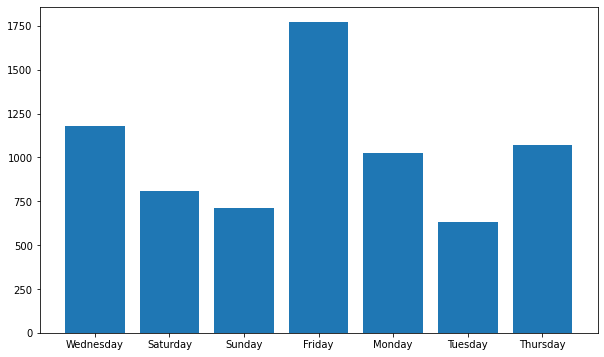

In [43]:
x=d["wdays"]
y=d["clicks"]
plt.bar(x,y)

<BarContainer object of 4571 artists>

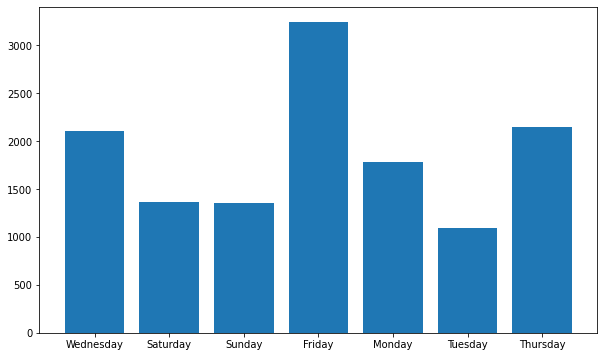

In [32]:
x=d["wdays"]
y=d["impressions"]
plt.bar(x,y)

<BarContainer object of 4571 artists>

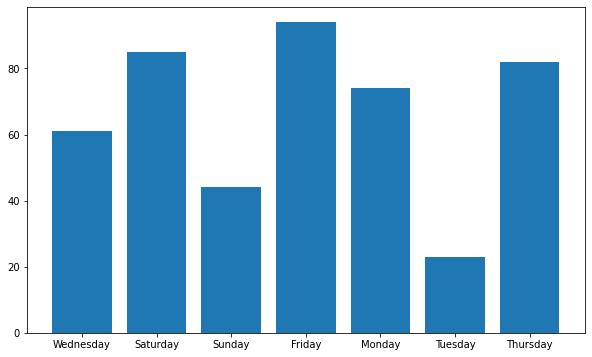

In [33]:
x=d["wdays"]
y=d["conversions"]
plt.bar(x,y)

In [44]:
data2 = [d["adgroup"],d["revenue"],d["cost"]]
df2 = pd.DataFrame(data2)
df6=df2.T
df6.head()

,adgroup,revenue,cost
0,adgroup 1,0,0.08
1,adgroup 2,0,0
2,adgroup 3,0,0.04
3,adgroup 4,0,0.08
4,adgroup 1,925.71,1.29


In [45]:
df6.sort_values(by=["adgroup"], inplace=True)
t=df6.groupby(['adgroup']).sum()
t1=pd.DataFrame(t)
t1["ROI"]=t1["revenue"]/t1["cost"]
t1

,revenue,cost,ROI
adgroup,,,
adgroup 1,515630.85,6486.02,79.498807
adgroup 2,3750.27,119.00,31.514874
adgroup 3,526427.64,5873.71,89.624384
adgroup 4,14047.71,323.88,43.373194


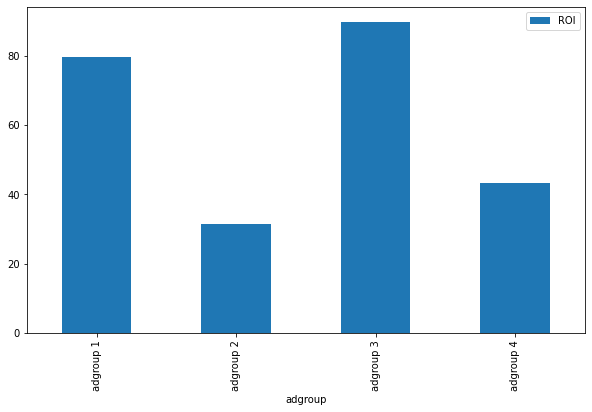

In [49]:
t1.drop('cost', inplace=True, axis=1)
t1.plot.bar()

In [50]:
d.describe()

,impressions,clicks,cost,conversions,revenue
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,92.635747,43.340844,2.800834,1.339094,231.865340
std,198.349737,100.164913,14.361618,5.223922,1091.742763
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000
max,3239.000000,1771.000000,531.250000,94.000000,20515.410000


In [51]:
d['CTR'] = (d['clicks']/d['impressions'])
d['CPC'] = (d['cost']/d['clicks'])
d['CPA'] = (d['cost']/d['conversions'])
d.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue,wdays,m,CTR,CPC,CPA
0,2020-01-08,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00,Wednesday,2020-01,0.250000,0.013333,inf
1,2020-01-08,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00,Wednesday,2020-01,0.000000,NaN,NaN
2,2020-01-08,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00,Wednesday,2020-01,0.307692,0.010000,inf
3,2020-01-08,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00,Wednesday,2020-01,0.800000,0.020000,inf
4,2020-01-08,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71,Wednesday,2020-01,0.510121,0.010238,0.3225


In [52]:
d.replace([np.inf, -np.inf], np.nan, inplace=True)

In [53]:
d.isnull().sum()

date              0
campaign          0
adgroup           0
ad                0
impressions       0
clicks            0
cost              0
conversions       0
revenue           0
wdays             0
m                 0
CTR               0
CPC             444
CPA            3213
dtype: int64

In [54]:
d.fillna(0)

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue,wdays,m,CTR,CPC,CPA
0,2020-01-08,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00,Wednesday,2020-01,0.250000,0.013333,0.0000
1,2020-01-08,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00,Wednesday,2020-01,0.000000,0.000000,0.0000
2,2020-01-08,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00,Wednesday,2020-01,0.307692,0.010000,0.0000
3,2020-01-08,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00,Wednesday,2020-01,0.800000,0.020000,0.0000
4,2020-01-08,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71,Wednesday,2020-01,0.510121,0.010238,0.3225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4566,2021-02-28,campaign 1,adgroup 3,ad 55,19,6,0.07,0,0.00,Sunday,2021-02,0.315789,0.011667,0.0000
4567,2021-02-28,campaign 1,adgroup 4,ad 55,1,0,0.00,0,0.00,Sunday,2021-02,0.000000,0.000000,0.0000
4568,2021-02-28,campaign 1,adgroup 3,ad 56,16,8,0.12,1,93.20,Sunday,2021-02,0.500000,0.015000,0.1200
4569,2021-02-28,campaign 1,adgroup 1,ad 56,37,13,0.23,0,0.00,Sunday,2021-02,0.351351,0.017692,0.0000


<BarContainer object of 4571 artists>

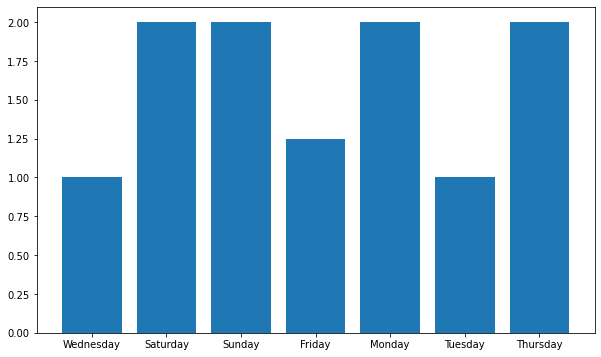

In [58]:
x=d["wdays"]
y=d["CTR"]
plt.bar(x,y)

<BarContainer object of 4571 artists>

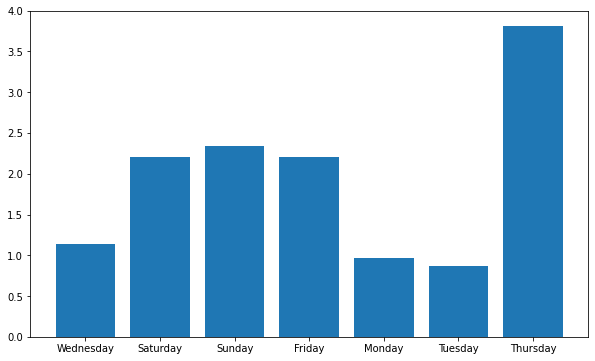

In [59]:
x=d["wdays"]
y=d["CPC"]
plt.bar(x,y)

<BarContainer object of 4571 artists>

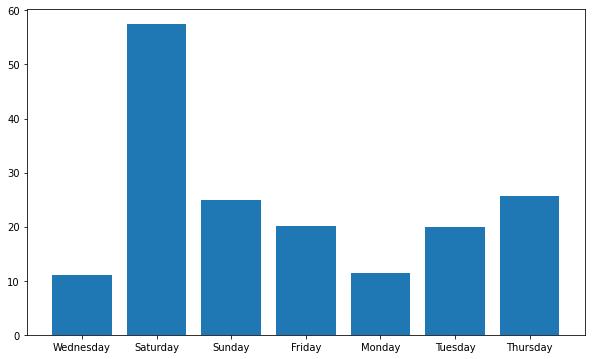

In [60]:
x=d["wdays"]
y=d["CPA"]
plt.bar(x,y)

In [55]:
d1=d["adgroup"]
d2=d["cost"]
d3=d["revenue"]
#to check which ad group has maximum revenue and minimum cost
#from below two pie chart it is evident that in campaign ad group 3 and ad group 1 has made the major impact
#it is visible from the pie chart that total cost for ad group 3 is less and it generates maximum revenue.
#ad group 4 and ad group 2 costs zero but still creates some revenue

In [56]:
import plotly.express as px
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=d1, values=d2)])
fig.show()

In [57]:
fig = go.Figure(data=[go.Pie(labels=d1, values=d3)])
fig.show()

In [61]:
data1 = [d["revenue"],d["impressions"],d["clicks"],d["cost"],d["conversions"]]
df3 = pd.DataFrame(data1)
df4=df3.T
df4
# to correlation between revenue,impression,clicks,cost and conversions

,revenue,impressions,clicks,cost,conversions
0,0.00,24.0,6.0,0.08,0.0
1,0.00,1.0,0.0,0.00,0.0
2,0.00,13.0,4.0,0.04,0.0
3,0.00,5.0,4.0,0.08,0.0
4,925.71,247.0,126.0,1.29,4.0
...,...,...,...,...,...
4566,0.00,19.0,6.0,0.07,0.0
4567,0.00,1.0,0.0,0.00,0.0
4568,93.20,16.0,8.0,0.12,1.0
4569,0.00,37.0,13.0,0.23,0.0


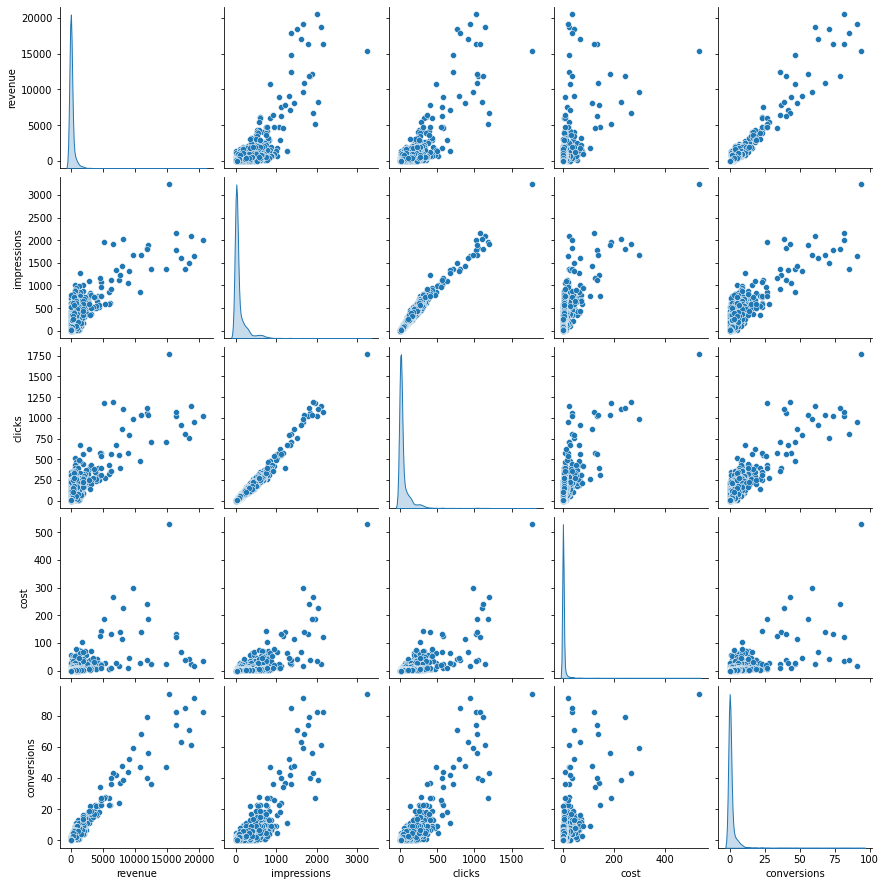

In [63]:
import seaborn as sns
sns.pairplot(data=df4, kind ='scatter',diag_kind='kde')


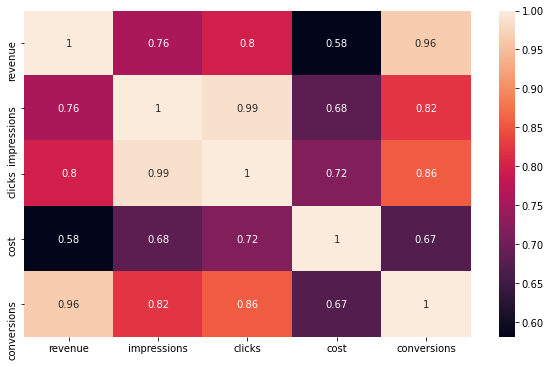

In [64]:
sns.heatmap(df4.corr(),annot=True)
#from heat map it is quite visible that all the values are above 0.5 and all the 5 terms shows a significant correlation among themselves
#conversion and revenue shows the significant correlation of 0.96 which means higher the conversion higher the revenues.
#it is visible that clicks and impressions shows a correlation of 0.99 

In [65]:
## to see correlation between CPC,CTR,CPA,clicks,impressions,conversions and cost
data3= [d["impressions"],d["clicks"],d["cost"],d["conversions"],d["CTR"],d["CPA"],d["CPC"]]
df5 = pd.DataFrame(data3)
df6=df5.T
df6

,impressions,clicks,cost,conversions,CTR,CPA,CPC
0,24.0,6.0,0.08,0.0,0.250000,NaN,0.013333
1,1.0,0.0,0.00,0.0,0.000000,NaN,NaN
2,13.0,4.0,0.04,0.0,0.307692,NaN,0.010000
3,5.0,4.0,0.08,0.0,0.800000,NaN,0.020000
4,247.0,126.0,1.29,4.0,0.510121,0.3225,0.010238
...,...,...,...,...,...,...,...
4566,19.0,6.0,0.07,0.0,0.315789,NaN,0.011667
4567,1.0,0.0,0.00,0.0,0.000000,NaN,NaN
4568,16.0,8.0,0.12,1.0,0.500000,0.1200,0.015000
4569,37.0,13.0,0.23,0.0,0.351351,NaN,0.017692


In [66]:
df6.replace([np.inf, -np.inf], np.nan, inplace=True)
df6.isnull().sum()
df6.fillna(0)

,impressions,clicks,cost,conversions,CTR,CPA,CPC
0,24.0,6.0,0.08,0.0,0.250000,0.0000,0.013333
1,1.0,0.0,0.00,0.0,0.000000,0.0000,0.000000
2,13.0,4.0,0.04,0.0,0.307692,0.0000,0.010000
3,5.0,4.0,0.08,0.0,0.800000,0.0000,0.020000
4,247.0,126.0,1.29,4.0,0.510121,0.3225,0.010238
...,...,...,...,...,...,...,...
4566,19.0,6.0,0.07,0.0,0.315789,0.0000,0.011667
4567,1.0,0.0,0.00,0.0,0.000000,0.0000,0.000000
4568,16.0,8.0,0.12,1.0,0.500000,0.1200,0.015000
4569,37.0,13.0,0.23,0.0,0.351351,0.0000,0.017692


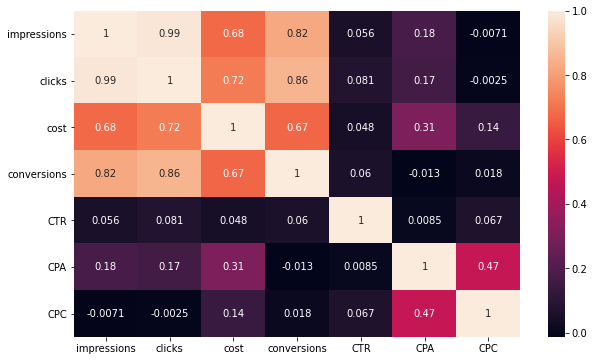

In [67]:
sns.heatmap(df6.corr(),annot=True)

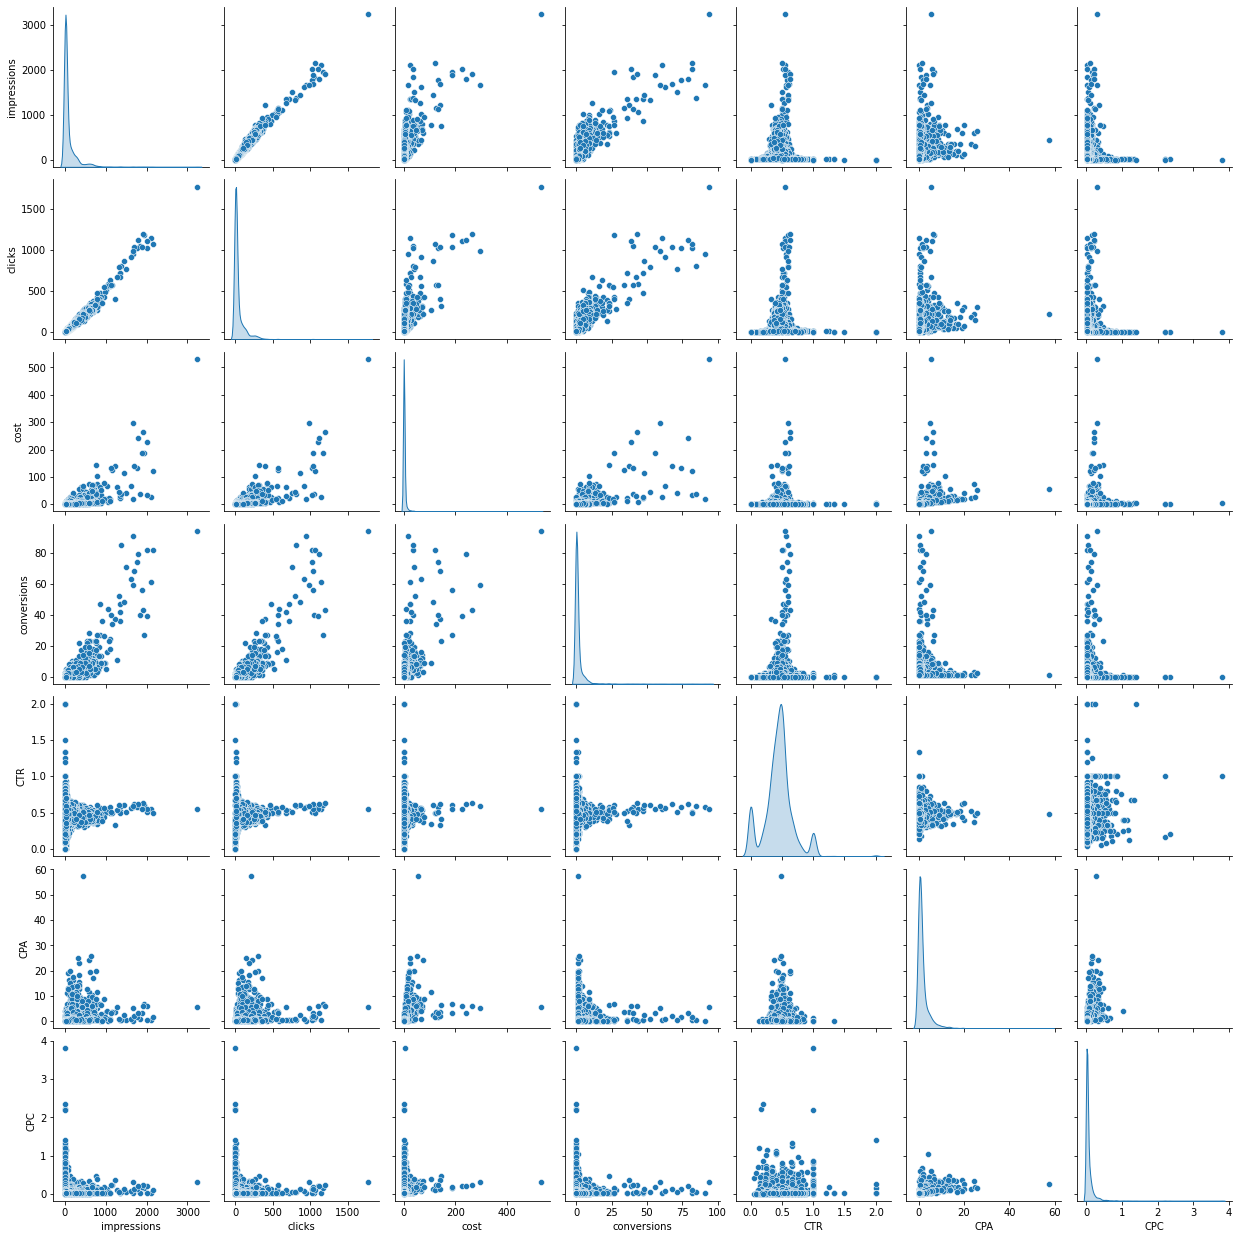

In [68]:
sns.pairplot(data=df6, kind ='scatter',diag_kind='kde')